# Exploratory Data Analysis


## 1. Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import emoji

## 2. Reading data

In [3]:
df = pd.read_parquet('cleaned_data/df_combined.parquet')

In [4]:
df

,id,possibly_sensitive,in_reply_to_user_id,created_at,referenced_tweets,edit_controls,text,edit_history_tweet_ids,reply_settings,author_id,...,links,hashtags,retweet_count,reply_count,like_count,quote_count,impression_count,text_clean_en,text_clean_en_demojized,name
0,1846267743022330112,False,5.092726e+08,2024-10-15 19:11:46+00:00,"[{'id': '1846155881169182787', 'type': 'replie...",{'editable_until': '2024-10-15 20:11:46+00:00'...,"@Dariusz_Jonski ""Ani kroku wstecz!"" - w przód ...",[1846267743022330183],everyone,1.187749e+18,...,[],[],0,1,13,0,219,"""Not a step back!"" - you haven't put any forw...","""Not a step back!"" - you haven't put any forw...",Włodzimierz Skalik
1,1846264777347117568,False,NaN,2024-10-15 18:59:59+00:00,None,{'editable_until': '2024-10-15 19:59:59+00:00'...,Właśnie zadzwonił do mnie nieznany numer. Już ...,[1846264777347117471],everyone,1.187749e+18,...,[],[],28,9,418,0,6449,An unknown number just called me. I thought it...,An unknown number just called me. I thought it...,Włodzimierz Skalik
2,1846262693394588160,False,9.552394e+08,2024-10-15 18:51:42+00:00,"[{'id': '1846127632112369787', 'type': 'replie...",{'editable_until': '2024-10-15 19:51:42+00:00'...,"@KosiniakKamysz Czy ""jeszcze cięższa praca"" pr...",[1846262693394588154],everyone,1.187749e+18,...,[],[],4,1,38,0,443,"Will ""even harder work"" translate into the fu...","Will ""even harder work"" translate into the fu...",Włodzimierz Skalik
3,1846261341327446272,False,NaN,2024-10-15 18:46:20+00:00,"[{'id': '1846159669573689602', 'type': 'quoted'}]",{'editable_until': '2024-10-15 19:46:20+00:00'...,Polecam się zapoznać z treścią konferencji 👇 ...,[1846261341327446163],everyone,1.187749e+18,...,[https://t.co/U7LAeL2cqP],[],9,2,48,0,687,I recommend reading the content of the confere...,I recommend reading the content of the confere...,Włodzimierz Skalik
4,1846104865829015552,False,NaN,2024-10-15 08:24:33+00:00,None,{'editable_until': '2024-10-15 09:24:33+00:00'...,❌ Kilka dni temu zagłosowałem za odwołaniem K...,[1846104865829015639],everyone,1.187749e+18,...,"[https://t.co/JQAQMEKjEs, https://t.co/4qtpUJO...",[],30,0,141,0,3354,"❌ A few days ago, I voted to dismiss Krzyszto...",":cross_mark: A few days ago, I voted to dismi...",Włodzimierz Skalik
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11452,1721611648257921024,False,NaN,2023-11-06 19:32:57+00:00,None,{'editable_until': '2023-11-06 20:32:57+00:00'...,Prezydent RP jest gwarantem ciągłości władzy p...,[1721611648257921084],everyone,9.640175e+08,...,[],[],17,6,53,1,4871,The President of the Republic of Poland is the...,The President of the Republic of Poland is the...,Dariusz Klimczak
11453,1720163035048706304,False,NaN,2023-11-02 19:36:41+00:00,"[{'id': '1720122294914187659', 'type': 'quoted'}]",{'editable_until': '2023-11-02 20:36:41+00:00'...,W państwach o ustabilizowanej demokracji siła ...,[1720163035048706306],everyone,9.640175e+08,...,[https://t.co/u1vzB6ImaB],[],18,2,41,2,3152,"In countries with stable democracy, the streng...","In countries with stable democracy, the streng...",Dariusz Klimczak
11454,1716897815400792320,False,NaN,2023-10-24 19:21:52+00:00,None,{'editable_until': '2023-10-24 20:21:52+00:00'...,Piękny epilog kampanii wyborczej:\n ✅ ️ @Rober...,[1716897815400792400],everyone,9.640175e+08,...,[https://t.co/MGuhesegb2],[#TrzeciaDroga],26,7,97,1,5674,A beautiful epilogue of the election campaign:...,A beautiful epilogue of the election campaign:...,Dariusz Klimczak
11455,1714387831425052928,False,3.370516e+09,2023-10-17 21:08:05+00:00,"[{'id': '1714386317277106257', 'type': 'replie...",{'editable_until': '2023-10-17 22:08:05+00:00'...,@motykamilosz Jak widać nie tylko w piosenkach...,[1714387831425052856],everyone,9.640175e+08,...,[],[],1,2,50,0,1301,"As you can see, not only in Eleni's songs ""Lo...","As you can see, not only in Eleni's songs ""Lo...",Dariusz Klimczak


## 3. Exploratory Data Analysis

### 3.1 Categories of tweets

category
Original    8235
Reply       1852
Quote       1370
Name: count, dtype: int64
Total tweets: 11457


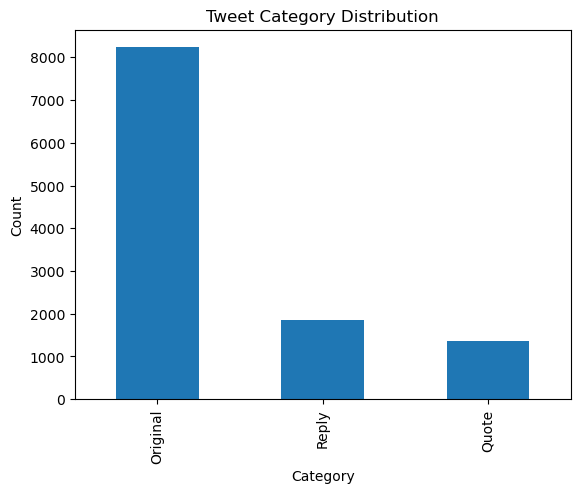

In [5]:
# Plot the category summary as a bar plot
category_summary = df['category'].value_counts()
print(category_summary)
total_tweets = category_summary.sum()
print(f"Total tweets: {total_tweets}")

category_summary.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Tweet Category Distribution')
plt.show()

Most of the downloaded tweets are original posts from politicians.

### 3.2 The most active users

#### 3.2.1 General (all posts)

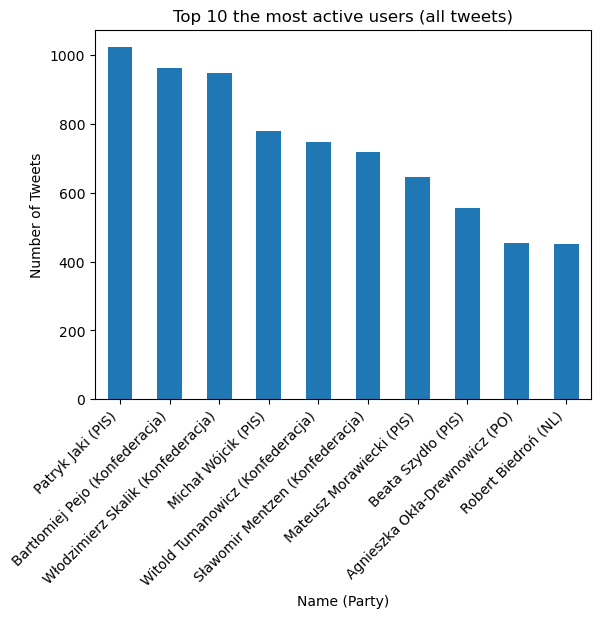

In [6]:
top_ten_users = df['name'].value_counts().head(10)
top_ten_users_df = top_ten_users.reset_index()
top_ten_users_df.columns = ['name', 'count']

top_ten_users_with_party = top_ten_users_df.merge(df[['name', 'party']].drop_duplicates(), on='name', how='left')

top_ten_users_with_party.plot(kind='bar', x='name', y='count', legend=False)
plt.xlabel('Name (Party)')
plt.ylabel('Number of Tweets')
plt.title('Top 10 the most active users (all tweets)')
labels = top_ten_users_with_party.apply(lambda row: f"{row['name']} ({row['party']})", axis=1)
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45, ha='right')
plt.show()

The three most active users are Patryk Jaki (PIS), Bartłomiej Pejo (Konfederacja), and Włodzimierz Skalik (Konfederacja). Each of them published around 1000 tweets in one year, averaging more than 2.5 tweets per day.

#### 3.2.2 General (only original posts)

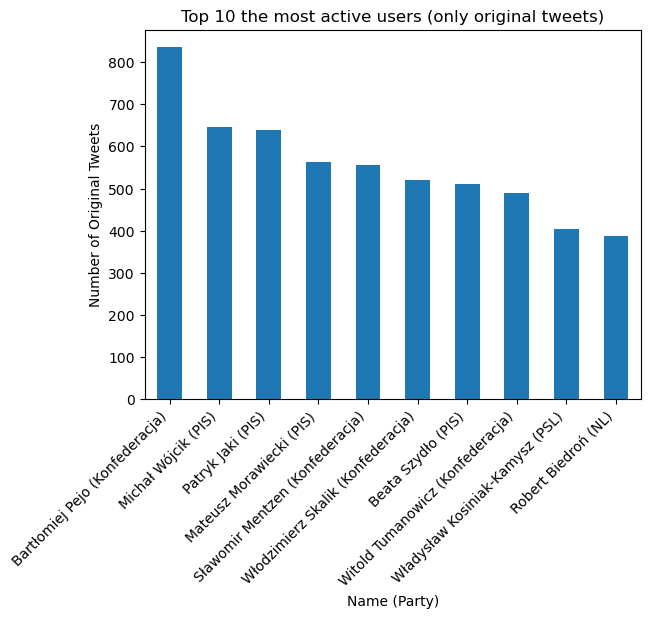

In [7]:
original_posts_df = df[df['category'] == 'Original']

top_ten_original_users = original_posts_df['name'].value_counts().head(10).reset_index()
top_ten_original_users.columns = ['name', 'count']

top_ten_original_users_with_party = top_ten_original_users.merge(df[['name', 'party']].drop_duplicates(), on='name', how='left')

top_ten_original_users_with_party.plot(kind='bar', x='name', y='count', legend=False)
plt.xlabel('Name (Party)')
plt.ylabel('Number of Original Tweets')
plt.title('Top 10 the most active users (only original tweets)')
labels = top_ten_original_users_with_party.apply(lambda row: f"{row['name']} ({row['party']})", axis=1)
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45, ha='right')
plt.show()

The most active poster was Bartłomiej Pejo (Konfederacja), who wrote more than 800 tweets, averaging over two tweets per day.

#### 3.2.3 The most active users for party (all tweets)

          party                       name  counts
0  Konfederacja            Bartłomiej Pejo     963
1            NL             Robert Biedroń     452
2           PIS                Patryk Jaki    1023
3        PL2050       Katarzyna Pelczyńska     225
4            PO  Agnieszka Okła-Drewnowicz     455
5           PSL  Władysław Kosiniak-Kamysz     408


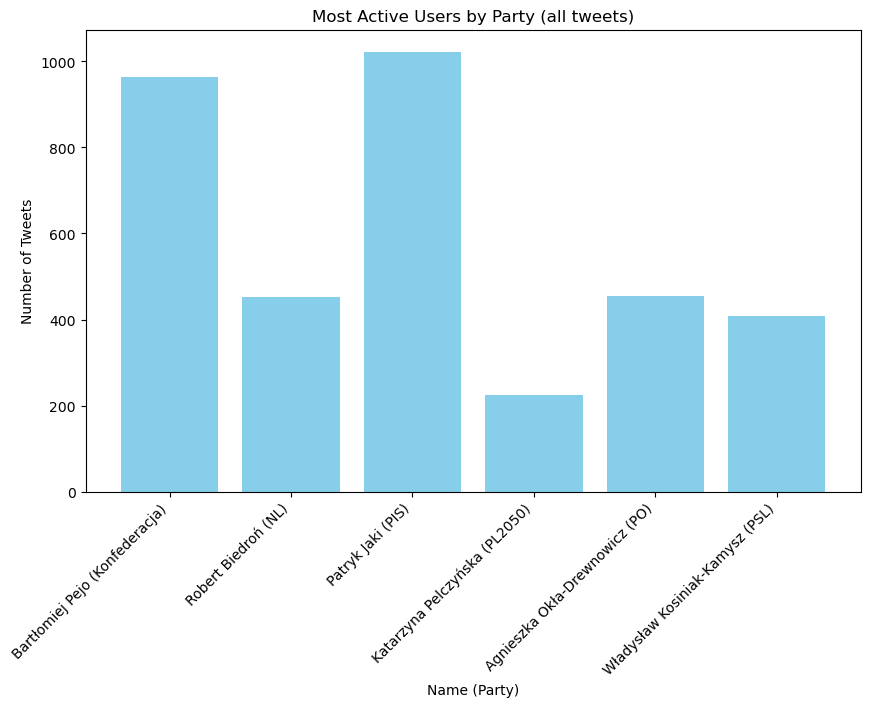

In [8]:
most_active_users = df.groupby('party')['name'].agg(lambda x: x.value_counts().idxmax())
tweet_counts = df.groupby(['party', 'name']).size().reset_index(name='counts')
most_active_users_with_counts = most_active_users.reset_index().merge(tweet_counts, on=['party', 'name'])
print(most_active_users_with_counts)
plt.figure(figsize=(10, 6))
plt.bar(most_active_users_with_counts['name'], most_active_users_with_counts['counts'], color='skyblue')
plt.xlabel('Name (Party)')
plt.ylabel('Number of Tweets')
plt.title('Most Active Users by Party (all tweets)')
plt.xticks(rotation=45, ha='right')
labels = most_active_users_with_counts.apply(lambda row: f"{row['name']} ({row['party']})", axis=1)
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45, ha='right')
plt.show()

The activity levels of the most active politicians from each party vary significantly. In Konfederacja and PIS, the most active users have around 1000 tweets, whereas in other parties, the most active users have around 400 tweets. In PL2050, the most active politician has approximately 2050 tweets.

#### 3.2.4 The most active users for party (only original tweets)

          party                       name  counts
0  Konfederacja            Bartłomiej Pejo     963
1            NL             Robert Biedroń     452
2           PIS              Michał Wójcik     781
3        PL2050       Katarzyna Pelczyńska     225
4            PO                Donald Tusk     337
5           PSL  Władysław Kosiniak-Kamysz     408


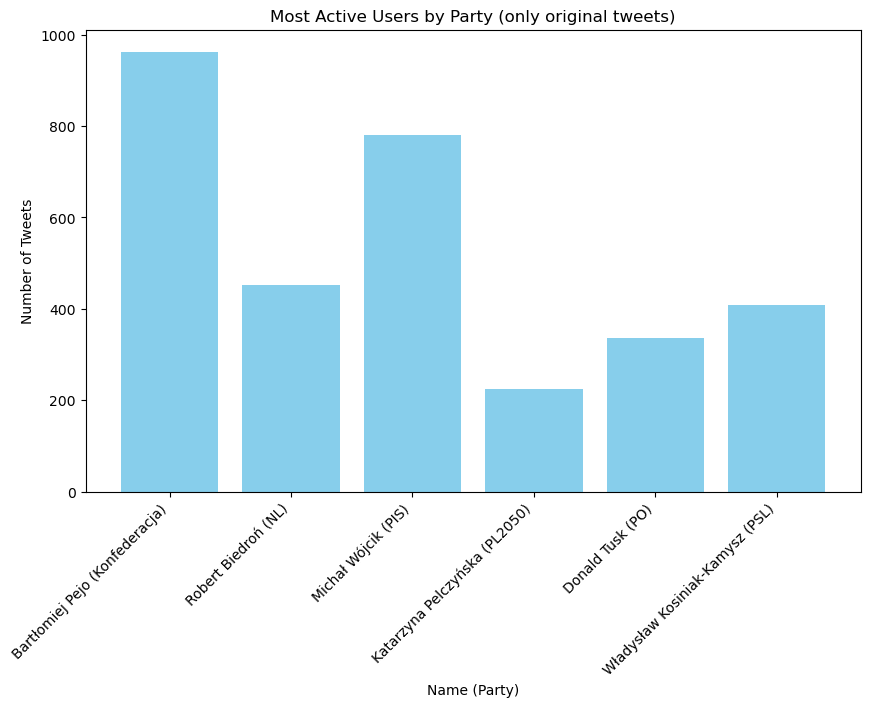

In [9]:
most_active_users = original_posts_df.groupby('party')['name'].agg(lambda x: x.value_counts().idxmax())
tweet_counts = df.groupby(['party', 'name']).size().reset_index(name='counts')
most_active_users_with_counts = most_active_users.reset_index().merge(tweet_counts, on=['party', 'name'])
print(most_active_users_with_counts)
plt.figure(figsize=(10, 6))
plt.bar(most_active_users_with_counts['name'], most_active_users_with_counts['counts'], color='skyblue')
plt.xlabel('Name (Party)')
plt.ylabel('Number of Tweets')
plt.title('Most Active Users by Party (only original tweets)')
plt.xticks(rotation=45, ha='right')
labels = most_active_users_with_counts.apply(lambda row: f"{row['name']} ({row['party']})", axis=1)
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45, ha='right')
plt.show()

### 3.3 Number of tweets per Party 

### 3.3.1 All tweets

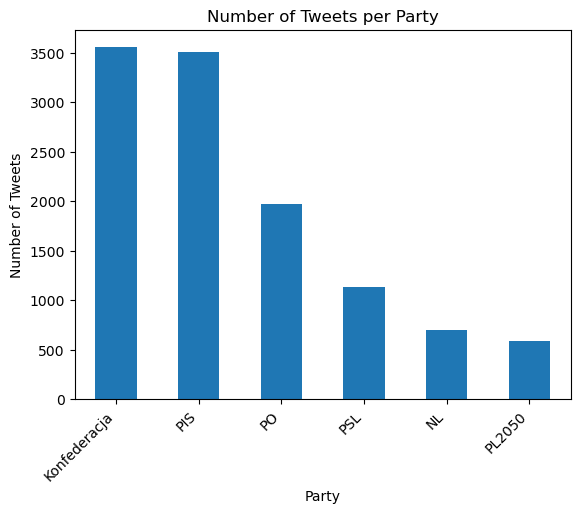

In [10]:
tweets_per_party = df['party'].value_counts()
tweets_per_party.plot(kind='bar')
plt.xlabel('Party')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Party')
plt.xticks(rotation=45, ha='right')
plt.show()

#### 3.3.2 Only original tweets

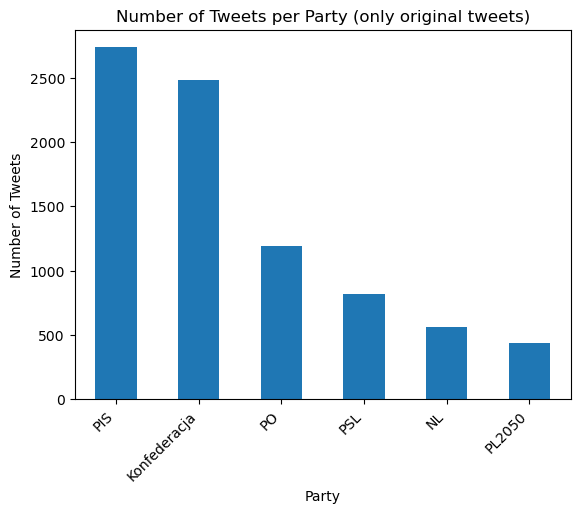

In [11]:
tweets_per_party = original_posts_df['party'].value_counts()
tweets_per_party.plot(kind='bar')
plt.xlabel('Party')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Party (only original tweets)')
plt.xticks(rotation=45, ha='right')
plt.show()

### 3.4 Publication time analysis 

#### 3.4.1 General

Spike around euroelection

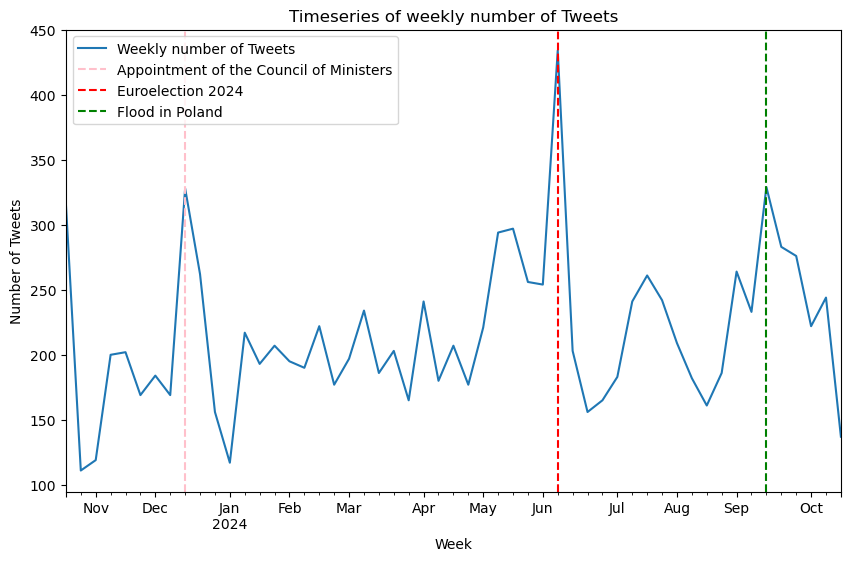

created_at
2024-06-09 00:00:00+00:00    434
2024-09-15 00:00:00+00:00    329
2023-12-17 00:00:00+00:00    328
2023-10-22 00:00:00+00:00    316
2024-05-19 00:00:00+00:00    297
dtype: int64


In [12]:
df['created_at'] = pd.to_datetime(df['created_at'])
df_time = df.copy()
df_time.set_index('created_at', inplace=True)
weekly_tweets = df_time.resample('W').size()
weekly_tweets.plot(kind='line', figsize=(10, 6), label='Weekly number of Tweets')
plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.title('Timeseries of weekly number of Tweets')
council_date = pd.to_datetime('2023-12-13')
plt.axvline(x=council_date, color='pink', linestyle='--', label='Appointment of the Council of Ministers')
euroelection_date = pd.to_datetime('2024-06-09')
plt.axvline(x=euroelection_date, color='red', linestyle='--', label='Euroelection 2024')
flood_date = pd.to_datetime('2024-09-15')
plt.axvline(x=flood_date, color='green', linestyle='--', label='Flood in Poland')
plt.legend()
plt.show()
weekly_tweets_sorted = weekly_tweets.sort_values(ascending=False)
print(weekly_tweets_sorted.head(5))

We can observe that peeks overlap with important political events.

#### 3.4.2 By Party

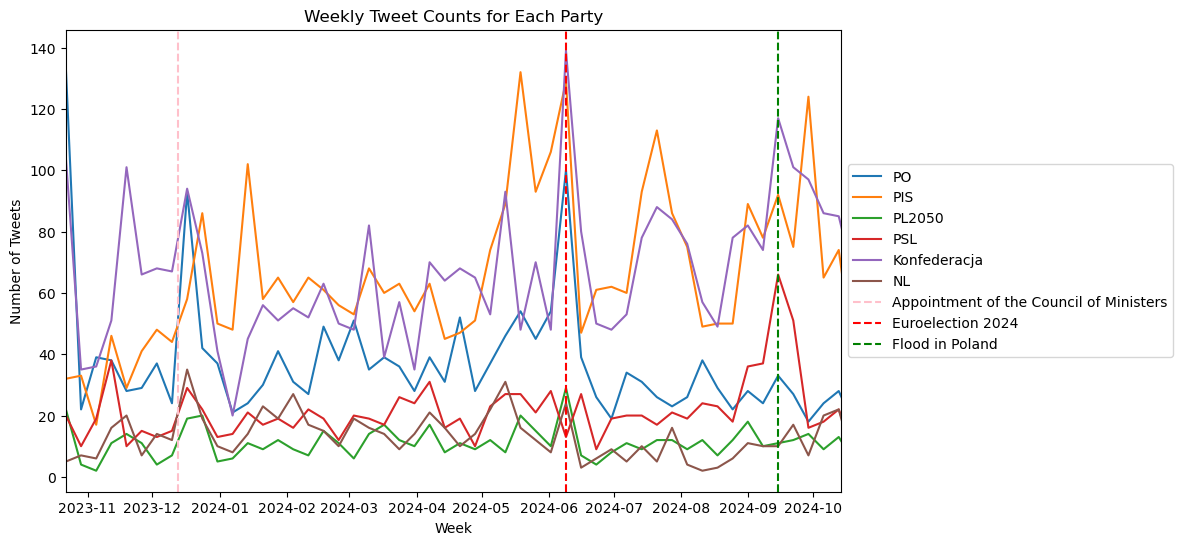

In [13]:
df_time_sorted = df_time.sort_index()
df_time_sorted['created_at'] = pd.to_datetime(df_time_sorted.index)
df_time_sorted.set_index('created_at', inplace=True)
parties = df_time_sorted['party'].unique()
plt.figure(figsize=(10, 6))
for party in parties:
    party_df = df_time_sorted[df_time_sorted['party'] == party]
    weekly_tweets = party_df.resample('W').size()
    plt.plot(weekly_tweets, label=party)
plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.title('Weekly Tweet Counts for Each Party')

plt.xlim(pd.to_datetime('2023-10-22'), pd.to_datetime('2024-10-14'))
council_date = pd.to_datetime('2023-12-13')
plt.axvline(x=council_date, color='pink', linestyle='--', label='Appointment of the Council of Ministers')
euroelection_date = pd.to_datetime('2024-06-09')
plt.axvline(x=euroelection_date, color='red', linestyle='--', label='Euroelection 2024')
flood_date = pd.to_datetime('2024-09-15')
plt.axvline(x=flood_date, color='green', linestyle='--', label='Flood in Poland')
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


We can observe that PO was the most active party after the parliamentary election and the appointment of the Council of Ministers. During the Euroelection, PIS and Konfederacja were more active. During the flood, there was a significant gap in activity between Konfederacja and PIS compared to other parties.

### 3.5 Average number of words in tweets

#### 3.5.1 By category

   category  word_count
0  Original   26.097784
1     Quote   16.221699
2     Reply   15.334375


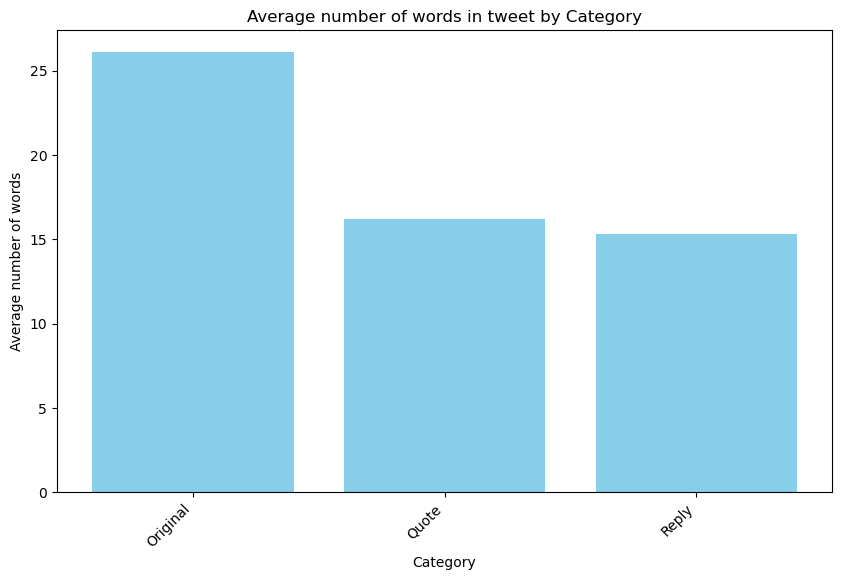

In [14]:
df['word_count'] = df['text_clean'].apply(lambda x: len(x.split()))

user_word_count_summary = df.groupby(['party', 'username', 'category'])['word_count'].mean().reset_index()

category_word_count_summary = user_word_count_summary.groupby(['category'])['word_count'].mean().reset_index()
print(category_word_count_summary)

plt.figure(figsize=(10, 6))
plt.bar(category_word_count_summary['category'], category_word_count_summary['word_count'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Average number of words')
plt.title('Average number of words in tweet by Category')
plt.xticks(rotation=45, ha='right')
plt.show()

As expected, original tweets are the longest type of posts on average.

#### 3.5.2 By party

          party  word_count
2           PIS   22.764396
5           PSL   20.948125
3        PL2050   20.742425
0  Konfederacja   18.275505
4            PO   16.666769
1            NL   13.646658


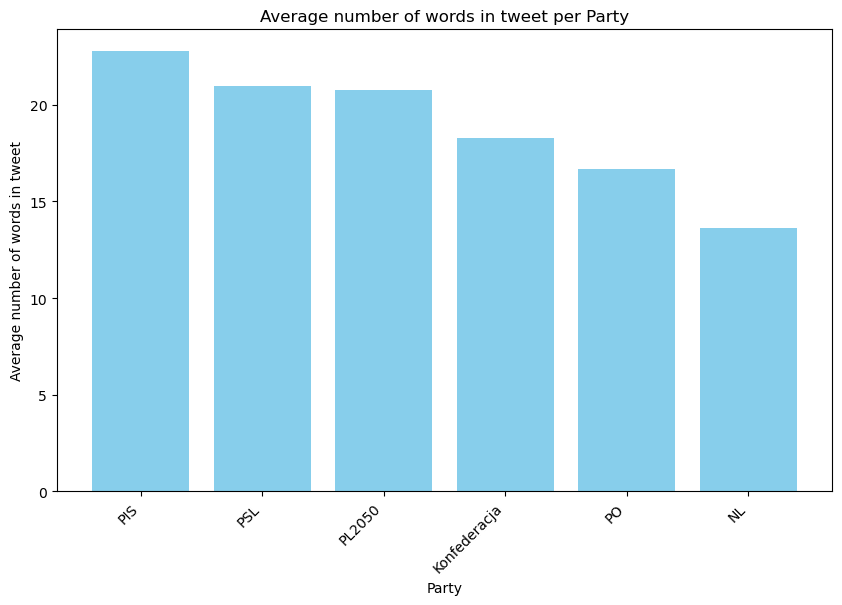

In [15]:
party_user_word_count_summary = user_word_count_summary.groupby('party')['word_count'].mean().reset_index()
party_user_word_count_summary = party_user_word_count_summary.sort_values(by='word_count', ascending=False)
print(party_user_word_count_summary)
plt.figure(figsize=(10, 6))
plt.bar(party_user_word_count_summary['party'], party_user_word_count_summary['word_count'], color='skyblue')
plt.xlabel('Party')
plt.ylabel('Average number of words in tweet')
plt.title('Average number of words in tweet per Party')
plt.xticks(rotation=45, ha='right')
plt.show()

We can observe that politicians from PIS tend to write the longest posts, while those from NL generally prefer shorter ones. However, it is worth noting that the difference in the average number of words is only 5, which is around 25% of the average post length.

#### 3.5.3 By user

     party                       name  word_count
11     PIS           Mariusz Kamiński   33.664894
31     PSL  Władysław Kosiniak-Kamysz   32.678922
16  PL2050       Katarzyna Pelczyńska   32.475556
23      PO                 Ewa Kopacz   30.509091
28     PSL           Dariusz Klimczak   28.529630
18  PL2050            Szymon Hołownia   28.048193
9      PIS               Beata Szydło   27.745946
29     PSL           Krzysztof Hetman   25.722222
12     PIS         Mateusz Morawiecki   25.218266
10     PIS             Elżbieta Witek   24.697368


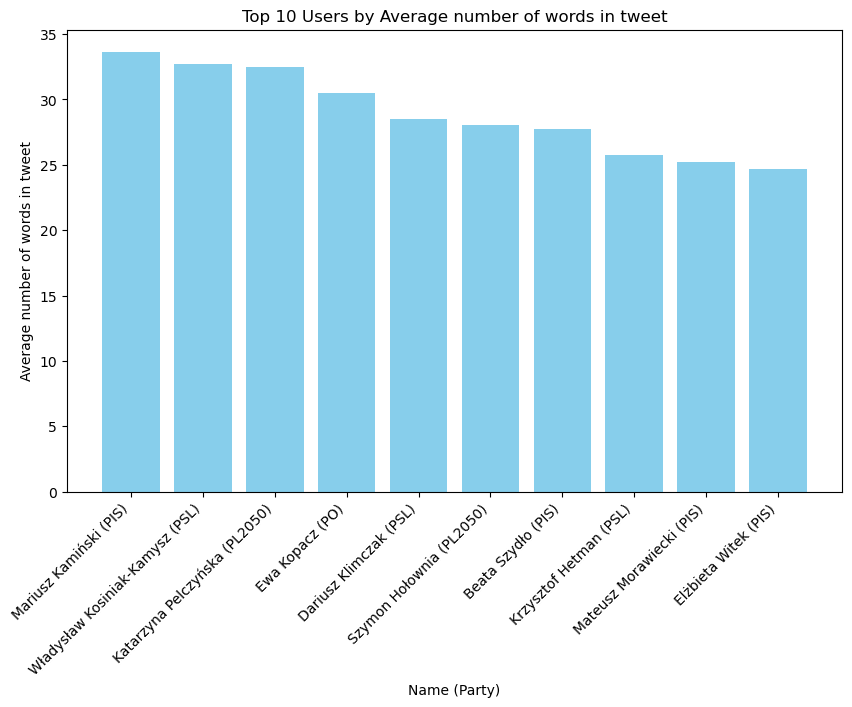

In [16]:
user_word_count_summary = df.groupby(['party', 'name'])['word_count'].mean().reset_index()

top_10_word_count = user_word_count_summary.sort_values(by='word_count', ascending=False).head(10)
print(top_10_word_count)

plt.figure(figsize=(10, 6))
plt.bar(top_10_word_count['name'] + ' (' + top_10_word_count['party'] + ')', top_10_word_count['word_count'], color='skyblue')
plt.xlabel('Name (Party)')
plt.ylabel('Average number of words in tweet')
plt.title('Top 10 Users by Average number of words in tweet')
plt.xticks(rotation=45, ha='right')
plt.show()


We can observe that the number of words used in tweets is not entirely dependent on the party affiliation. It appears to be more of a personal characteristic. However, it is interesting to note that none of the top 10 users by average number of words per tweet are from Konfederacja.

#### 3.5.4 Histograms per party

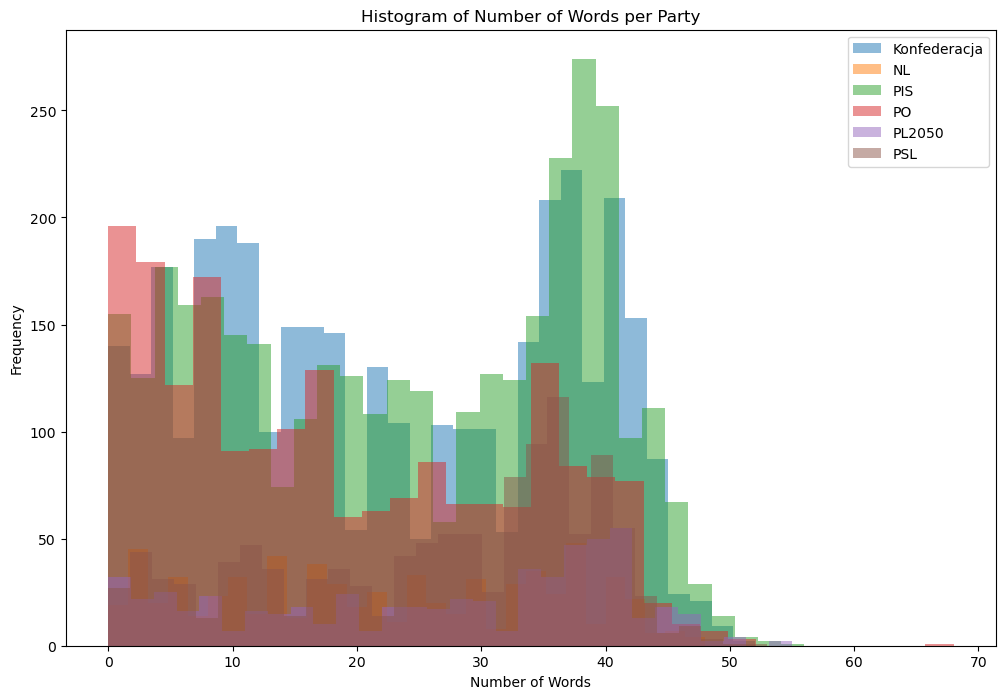

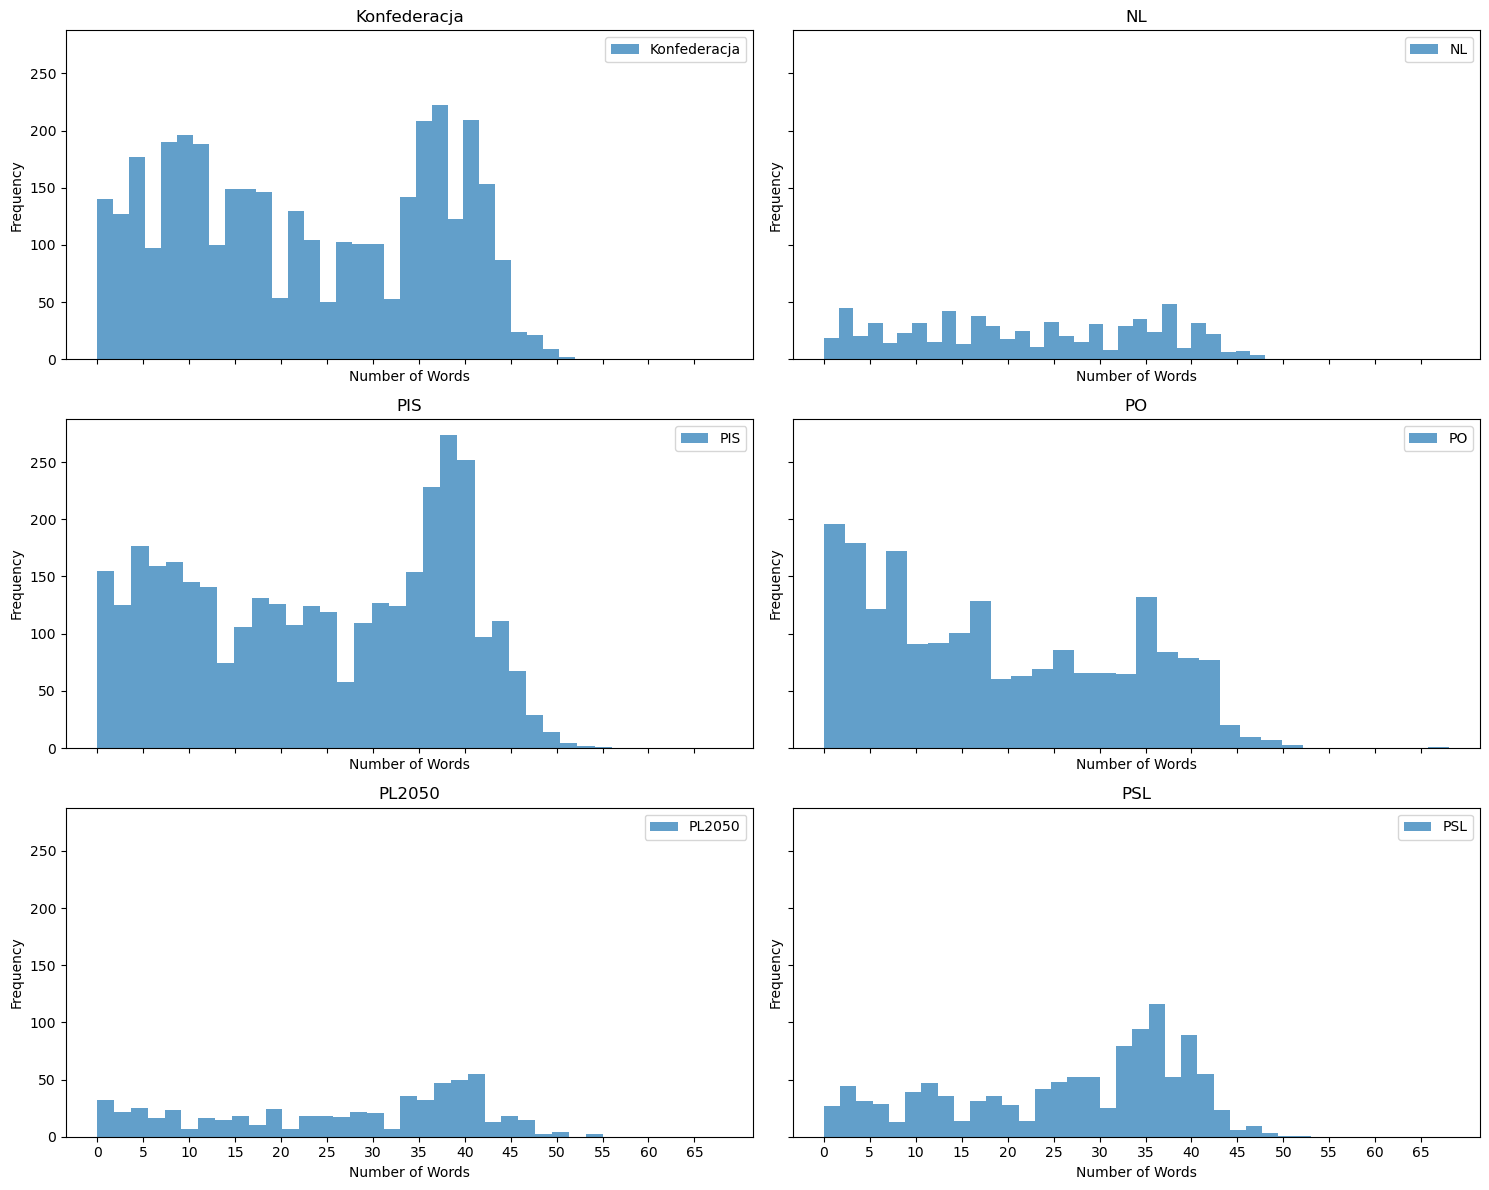

In [17]:
parties = df['party'].unique()
plt.figure(figsize=(12, 8))

for party in parties:
    plt.hist(df[df['party'] == party]['word_count'], bins=30, alpha=0.5, label=party)

plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Words per Party')
plt.legend()
plt.show()
fig, axes = plt.subplots(3, 2, figsize=(15, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, party in enumerate(parties):
    axes[i].hist(df[df['party'] == party]['word_count'], bins=30, alpha=0.7, label=party)
    axes[i].set_title(f'{party}')
    axes[i].set_xlabel('Number of Words')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].set_xticks(range(0, df['word_count'].max() + 1, 5))  # Set x-axis scale

plt.tight_layout()
plt.show()


We can observe that the most common tweet lengths are very short, up to 5 words, and around 10 words. Interestingly, there is also a notable peak at around 40 words. Each party shows a significant number of tweets with approximately 40 words.

### 3.6 Average number of emojis in tweets

#### 3.6.1 By party

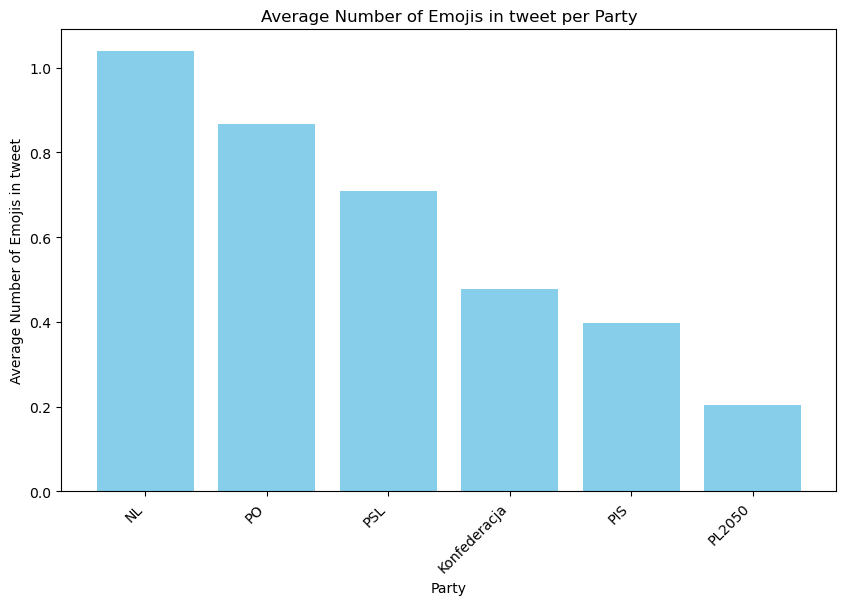

          party  average_emoji_per_post
1            NL                1.038571
4            PO                0.867513
5           PSL                0.709507
0  Konfederacja                0.477075
2           PIS                0.396689
3        PL2050                0.204392


In [18]:
def count_emojis(text):
    return sum(1 for char in text if char in emoji.EMOJI_DATA)
df['emoji_count'] = df['text_clean'].apply(count_emojis)
emoji_counts_per_party = df.groupby('party')['emoji_count'].sum().reset_index()
emoji_counts_per_party.columns = ['party', 'total_emoji_count']
average_emoji_per_post_per_party = df.groupby('party')['emoji_count'].mean().reset_index()
average_emoji_per_post_per_party.columns = ['party', 'average_emoji_per_post']
average_emoji_per_post_per_party = average_emoji_per_post_per_party.sort_values(by='average_emoji_per_post', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(average_emoji_per_post_per_party['party'], average_emoji_per_post_per_party['average_emoji_per_post'], color='skyblue')
plt.xlabel('Party')
plt.ylabel('Average Number of Emojis in tweet')
plt.title('Average Number of Emojis in tweet per Party')
plt.xticks(rotation=45, ha='right')
plt.show()
print(average_emoji_per_post_per_party)

Politicians in Nowa Lewica use, on average, more than one emoji per tweet, while those in PL2050 use only 0.2 emojis per tweet on average.

#### 3.6.2 By user

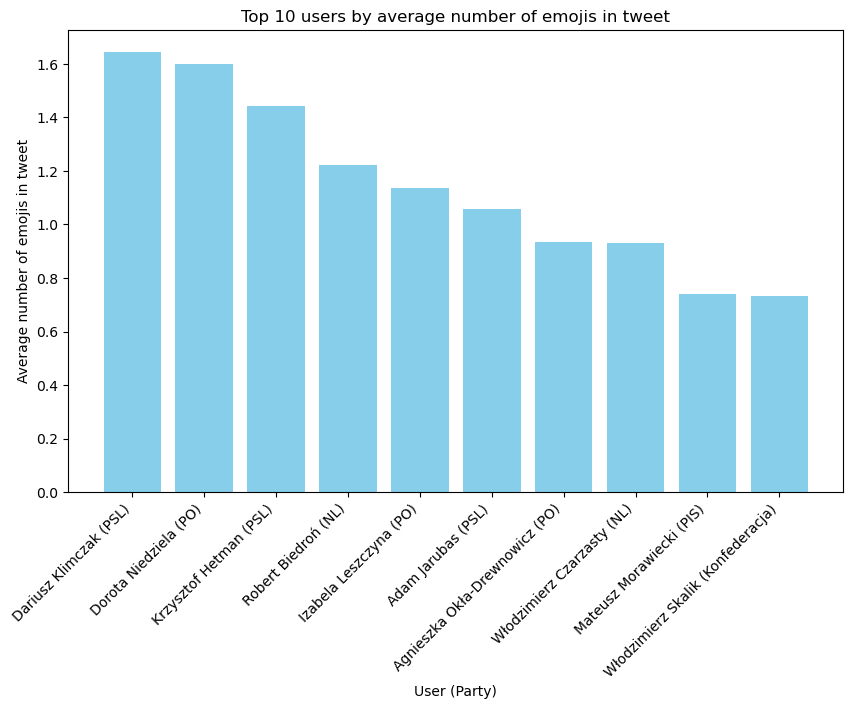

                        name  average_emoji_per_post         party
0           Dariusz Klimczak                1.644444           PSL
1           Dorota Niedziela                1.598039            PO
2           Krzysztof Hetman                1.444444           PSL
3             Robert Biedroń                1.221239            NL
4          Izabela Leszczyna                1.137662            PO
5               Adam Jarubas                1.057592           PSL
6  Agnieszka Okła-Drewnowicz                0.934066            PO
7      Włodzimierz Czarzasty                0.930556            NL
8         Mateusz Morawiecki                0.741486           PIS
9         Włodzimierz Skalik                0.734457  Konfederacja


In [19]:
emoji_counts_per_user = df.groupby('name')['emoji_count'].sum().reset_index()
emoji_counts_per_user.columns = ['name', 'total_emoji_count']
average_emoji_per_post_per_user = df.groupby('name')['emoji_count'].mean().reset_index()
average_emoji_per_post_per_user.columns = ['name', 'average_emoji_per_post']
average_emoji_per_post_per_user = average_emoji_per_post_per_user.sort_values(by='average_emoji_per_post', ascending=False)

top_10_emoji_users = average_emoji_per_post_per_user.head(10)
top_10_emoji_users = top_10_emoji_users.merge(df[['name', 'party']].drop_duplicates(), on='name', how='left')

plt.figure(figsize=(10, 6))
plt.bar(top_10_emoji_users['name'] + ' (' + top_10_emoji_users['party'] + ')', top_10_emoji_users['average_emoji_per_post'], color='skyblue')
plt.xlabel('User (Party)')
plt.ylabel('Average number of emojis in tweet')
plt.title('Top 10 users by average number of emojis in tweet')
plt.xticks(rotation=45, ha='right')
plt.show()

print(top_10_emoji_users)

We can observe that some politicians use more than 1.5 emojis per tweet.

#### 3.7 Public metrics

#### 3.7.1 By party

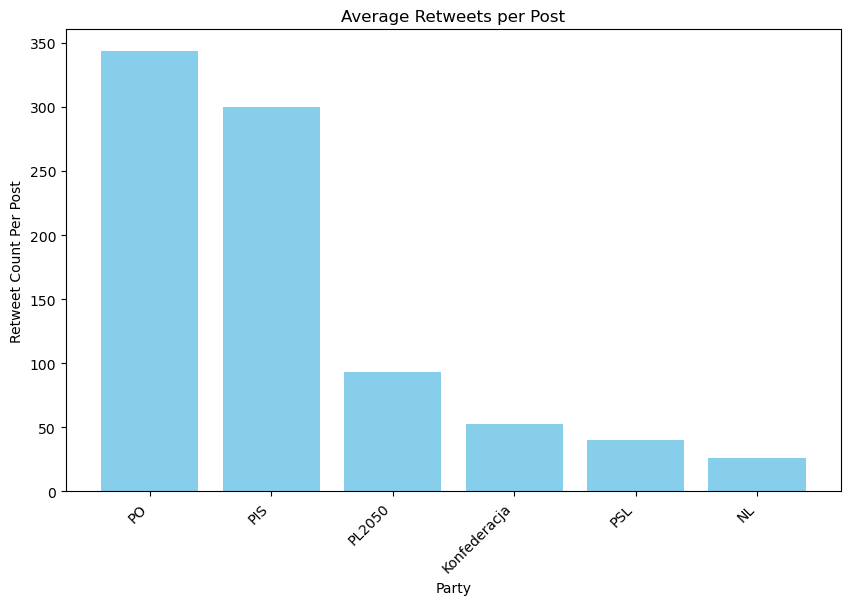

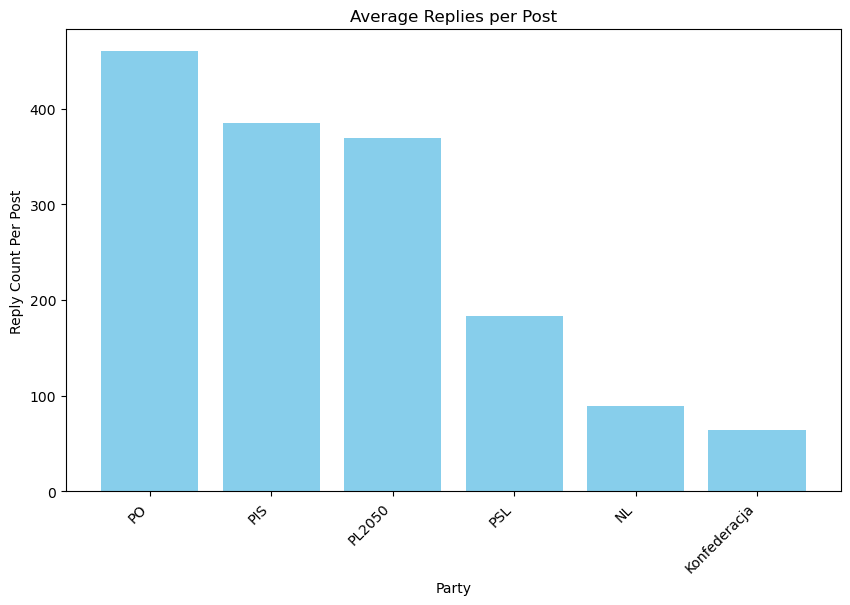

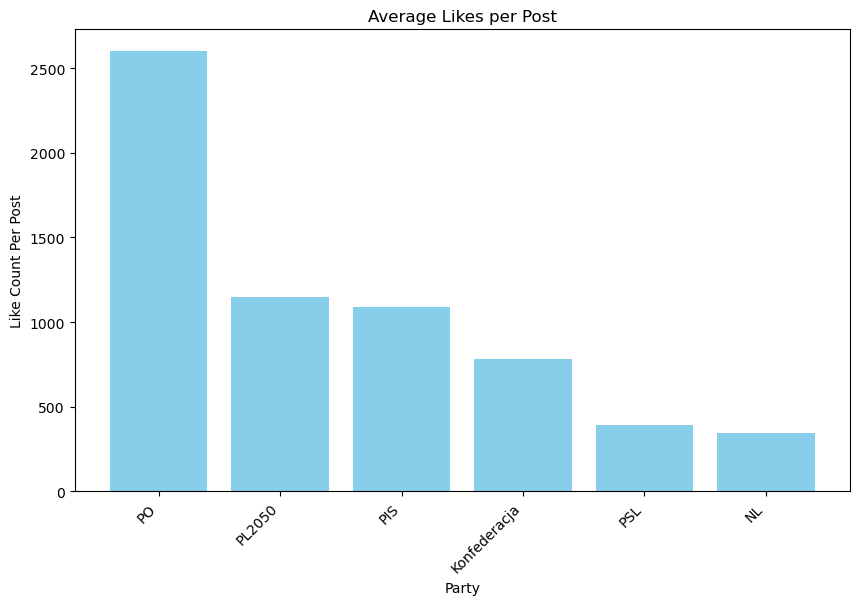

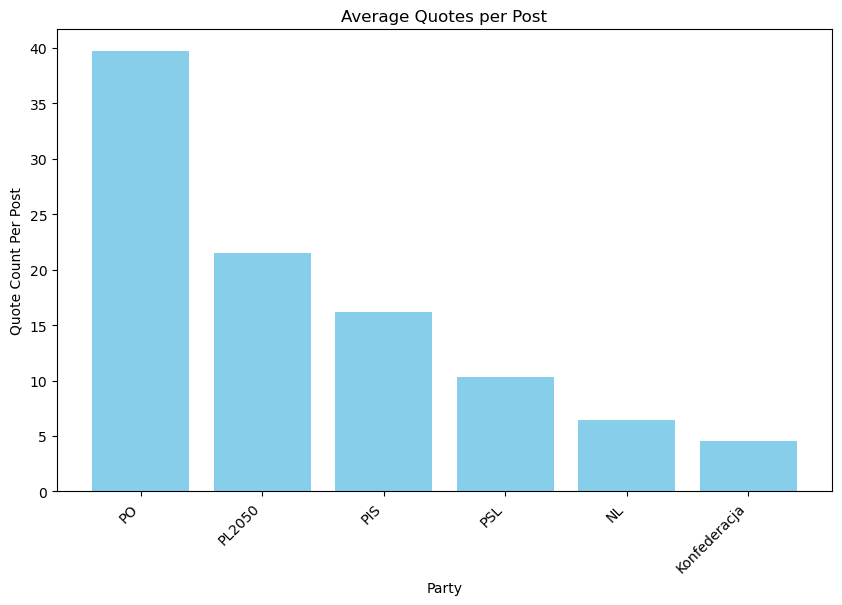

In [20]:
public_metrics_summary = df.groupby('party')[['retweet_count', 'reply_count', 'like_count', 'quote_count']].sum().reset_index()

total_posts_per_party = df['party'].value_counts().reset_index()
total_posts_per_party.columns = ['party', 'total_posts']

public_metrics_summary = public_metrics_summary.merge(total_posts_per_party, on='party')

public_metrics_summary['retweet_count_per_post'] = public_metrics_summary['retweet_count'] / public_metrics_summary['total_posts']
public_metrics_summary['reply_count_per_post'] = public_metrics_summary['reply_count'] / public_metrics_summary['total_posts']
public_metrics_summary['like_count_per_post'] = public_metrics_summary['like_count'] / public_metrics_summary['total_posts']
public_metrics_summary['quote_count_per_post'] = public_metrics_summary['quote_count'] / public_metrics_summary['total_posts']
metrics = ['retweet_count_per_post', 'reply_count_per_post', 'like_count_per_post', 'quote_count_per_post']
titles = ['Average Retweets per Post', 'Average Replies per Post', 'Average Likes per Post', 'Average Quotes per Post']

for i, metric in enumerate(metrics):
    sorted_df = public_metrics_summary.sort_values(by=metric, ascending=False)
    plt.figure(figsize=(10, 6))
    plt.bar(sorted_df['party'], sorted_df[metric], color='skyblue')
    plt.xlabel('Party')
    plt.ylabel(metric.replace('_', ' ').title())
    plt.title(titles[i])
    plt.xticks(rotation=45, ha='right')
    plt.show()


As we can observe, PO has the most active observers, with the highest average number of each public metric. The second party with the highest average number of retweets and replies is PIS. However, in terms of tweet likes and quotes, PL2050 ranks second.

#### 3.7.2 By users

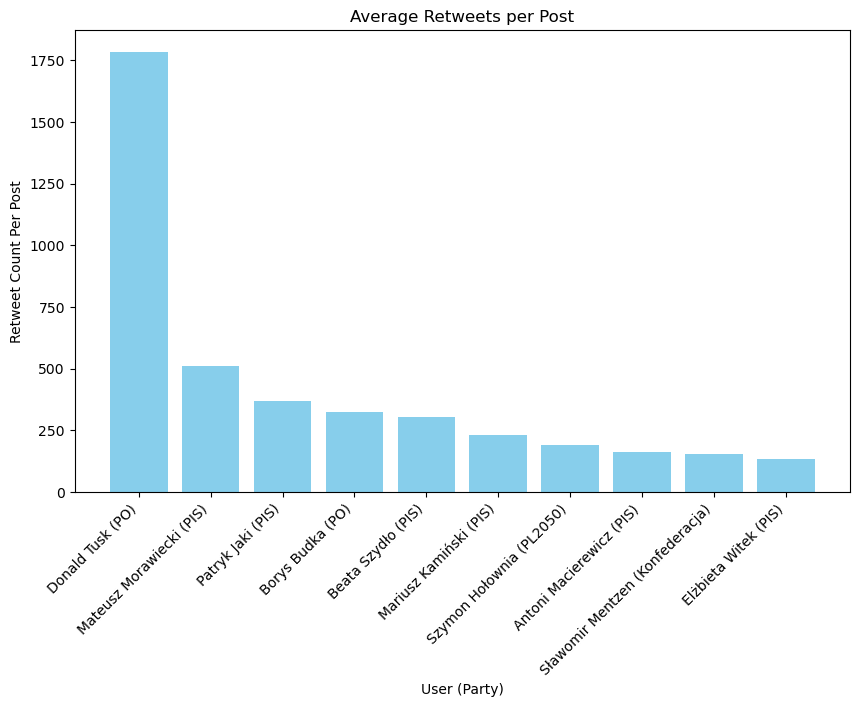

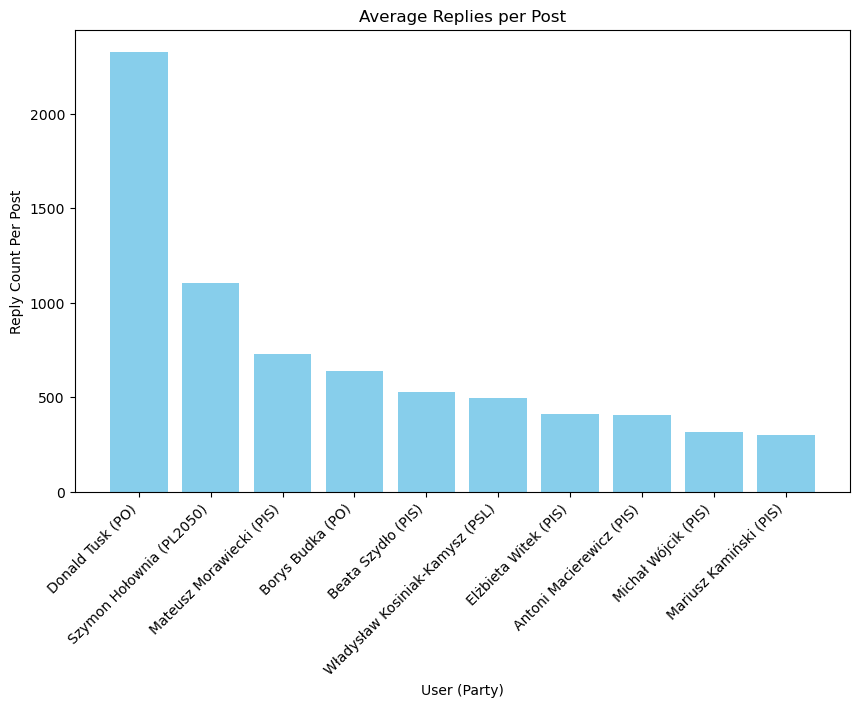

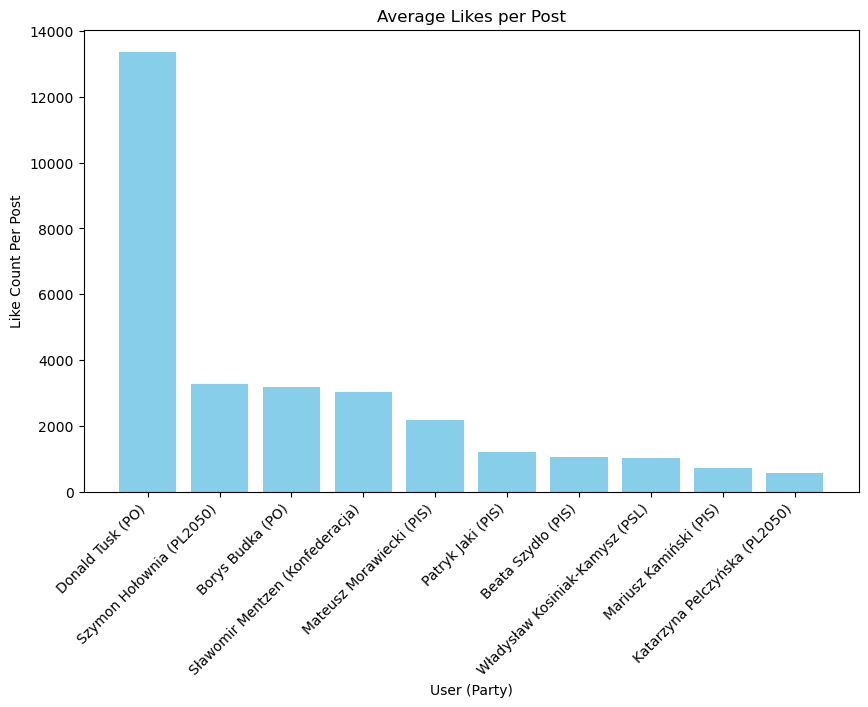

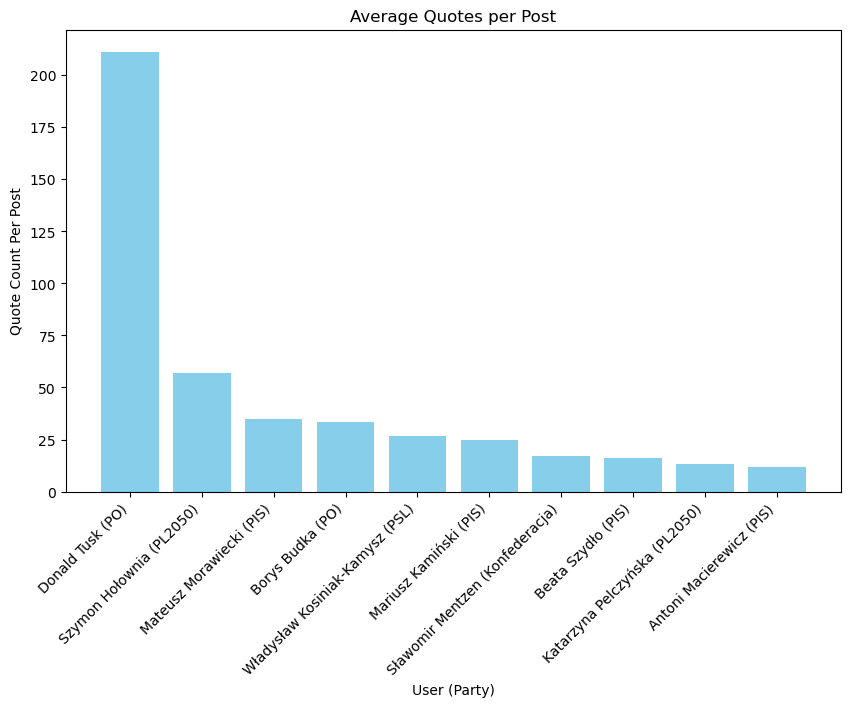

In [21]:
public_metrics_summary_user = df.groupby('name')[['retweet_count', 'reply_count', 'like_count', 'quote_count']].sum().reset_index()

total_posts_per_user = df['name'].value_counts().reset_index()
total_posts_per_user.columns = ['name', 'total_posts']

public_metrics_summary_user = public_metrics_summary_user.merge(total_posts_per_user, on='name')

public_metrics_summary_user['retweet_count_per_post'] = public_metrics_summary_user['retweet_count'] / public_metrics_summary_user['total_posts']
public_metrics_summary_user['reply_count_per_post'] = public_metrics_summary_user['reply_count'] / public_metrics_summary_user['total_posts']
public_metrics_summary_user['like_count_per_post'] = public_metrics_summary_user['like_count'] / public_metrics_summary_user['total_posts']
public_metrics_summary_user['quote_count_per_post'] = public_metrics_summary_user['quote_count'] / public_metrics_summary_user['total_posts']

public_metrics_summary_user = public_metrics_summary_user.merge(df[['name', 'party']].drop_duplicates(), on='name', how='left')

metrics = ['retweet_count_per_post', 'reply_count_per_post', 'like_count_per_post', 'quote_count_per_post']
titles = ['Average Retweets per Post', 'Average Replies per Post', 'Average Likes per Post', 'Average Quotes per Post']

for i, metric in enumerate(metrics):
    sorted_df = public_metrics_summary_user.sort_values(by=metric, ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    plt.bar(sorted_df['name'] + ' (' + sorted_df['party'] + ')', sorted_df[metric], color='skyblue')
    plt.xlabel('User (Party)')
    plt.ylabel(metric.replace('_', ' ').title())
    plt.title(titles[i])
    plt.xticks(rotation=45, ha='right')
    plt.show()

Donald Tusk from PO is the most influential politician in Poland, exhibiting the highest engagement in response to his posts among all politicians.